In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
customer_features = merged_data.groupby('CustomerID').agg({
    'Region': 'first',  # Categorical data
    'SignupDate': 'first',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

In [53]:
# Encode categorical features
customer_features['Region'] = pd.factorize(customer_features['Region'])[0]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(['CustomerID', 'SignupDate'], axis=1))

# Compute similarity matrix
similarity_matrix = cosine_similarity(scaled_features)

In [55]:
# Use customer features for clustering
clustering_data = customer_features.drop(['CustomerID', 'SignupDate'], axis=1)

# Apply scaling
scaled_clustering_data = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_clustering_data)

# Add cluster labels to the original data
customer_features['Cluster'] = clusters

# Evaluate with Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_clustering_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9369341798550336


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


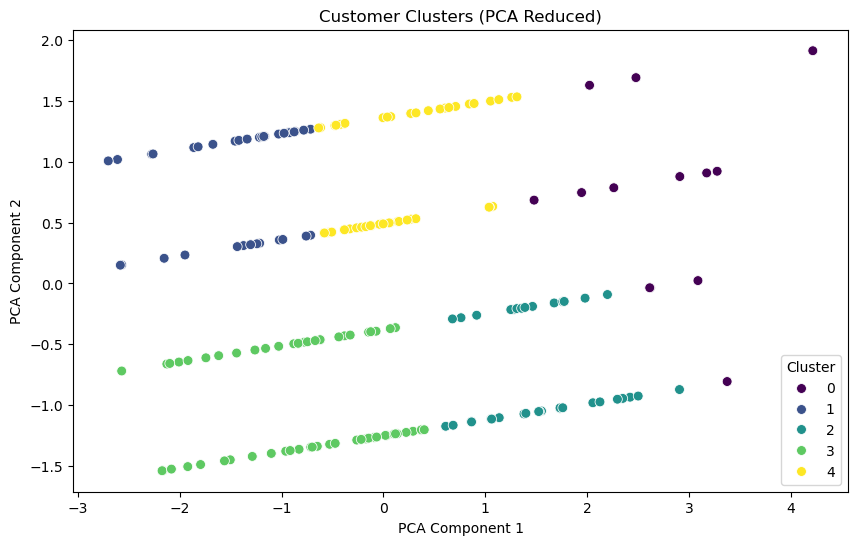

In [57]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_clustering_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
